In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
users = pd.read_csv("Users.csv")
competition = pd.read_csv("Competition.csv")
user_activity = pd.read_csv("UserActivity.csv")
variables = pd.read_csv("VariableDefinitions.csv")
sample = pd.read_csv("SampleSubmission.csv")
competition_participation = pd.read_csv("CompetitionPartipation.csv")
blogs = pd.read_csv("Blogs.csv")

## Cleaning Methods

In [3]:
def replace(df):
    df.columns = df.columns.str.replace(' ','_')
    df.columns = df.columns.str.lower()
    print(df.columns)


In [4]:
def ordered(df,ordered_dict):
    for var in ordered_dict:
        ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = ordered_dict[var])
    df[var] = df[var].astype(ordered_var)

### a) Competition Participation

In [5]:
competition_participation.head()

,Competition ID,Participant Type,Successful Submission Count,User_ID,Created At time,Created At Year,Created At Month,Created At Day_of_month
0,ID_WPP3,1,NaN,ID_40G01FGV,19:38:04.689865,1,11,20
1,ID_ZN92,1,NaN,ID_40G01FGV,19:38:04.670583,1,11,20
2,ID_I9BN,1,NaN,ID_40G01FGV,12:06:55.884320,1,12,17
3,ID_PDKH,1,count 10,ID_40G01FGV,11:24:04.239058,1,12,6
4,ID_CFN7,1,NaN,ID_P33ABQX5,05:16:09.052129,1,5,26


In [6]:
competition_participation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8385 entries, 0 to 8384
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Competition ID               8385 non-null   object
 1   Participant Type             8385 non-null   int64 
 2   Successful Submission Count  1449 non-null   object
 3   User_ID                      8385 non-null   object
 4   Created At time              8385 non-null   object
 5   Created At Year              8385 non-null   int64 
 6   Created At Month             8385 non-null   int64 
 7   Created At Day_of_month      8385 non-null   int64 
dtypes: int64(4), object(4)
memory usage: 524.2+ KB


In [7]:
replace(competition_participation)

Index(['competition_id', 'participant_type', 'successful_submission_count',
       'user_id', 'created_at_time', 'created_at_year', 'created_at_month',
       'created_at_day_of_month'],
      dtype='object')


### b) Users

In [8]:
users1=users.copy()
users1

,FeatureX,FeatureY,User_ID,Countries_ID,Created At time,Created At Year,Created At Month,Created At Day_of_month
0,0,0,ID_DC6S4E9O,X9GR,19:33:13.663391,1,1,16
1,1,0,ID_E8S97OUT,X9GR,22:18:18.228921,1,12,27
2,0,0,ID_QZ1HASL3,X9GR,23:13:03.266635,1,1,1
3,1,0,ID_SDV9Q3E9,X9GR,09:50:09.697573,1,12,27
4,1,0,ID_W942LN7F,X9GR,13:33:06.531662,1,1,16
...,...,...,...,...,...,...,...,...
12408,0,1,ID_C5393PD0,7DKX,05:02:39.352427,1,11,6
12409,0,1,ID_QX7XRT0C,K4DG,02:50:19.027320,1,3,25
12410,0,1,ID_RGN2RK66,ONON,22:06:33.713692,1,12,7
12411,0,0,ID_XZS1QE0W,3YQR,06:56:02.570173,1,5,27


In [9]:
users1.describe()

,FeatureX,FeatureY,Created At Year,Created At Month,Created At Day_of_month
count,12413.000000,12413.000000,12413.0,12413.000000,12413.000000
mean,0.085314,0.528237,1.0,5.258922,16.305970
std,0.279359,0.891619,0.0,3.970421,9.023629
min,0.000000,0.000000,1.0,1.000000,1.000000
25%,0.000000,0.000000,1.0,2.000000,8.000000
50%,0.000000,0.000000,1.0,4.000000,17.000000
75%,0.000000,1.000000,1.0,11.000000,25.000000
max,1.000000,3.000000,1.0,12.000000,31.000000


In [10]:
users1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12413 entries, 0 to 12412
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   FeatureX                 12413 non-null  int64 
 1   FeatureY                 12413 non-null  int64 
 2   User_ID                  12413 non-null  object
 3   Countries_ID             6531 non-null   object
 4   Created At time          12413 non-null  object
 5   Created At Year          12413 non-null  int64 
 6   Created At Month         12413 non-null  int64 
 7   Created At Day_of_month  12413 non-null  int64 
dtypes: int64(5), object(3)
memory usage: 775.9+ KB


In [11]:
replace(users1)

Index(['featurex', 'featurey', 'user_id', 'countries_id', 'created_at_time',
       'created_at_year', 'created_at_month', 'created_at_day_of_month'],
      dtype='object')


In [12]:
ordered_dict = {'created_at_month': [1,2,3,4,5,6,7,8,9,10,11,12],
               'created_at_day_of_month':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31]}
ordered(users1,ordered_dict)
users1

,featurex,featurey,user_id,countries_id,created_at_time,created_at_year,created_at_month,created_at_day_of_month
0,0,0,ID_DC6S4E9O,X9GR,19:33:13.663391,1,1,16
1,1,0,ID_E8S97OUT,X9GR,22:18:18.228921,1,12,27
2,0,0,ID_QZ1HASL3,X9GR,23:13:03.266635,1,1,1
3,1,0,ID_SDV9Q3E9,X9GR,09:50:09.697573,1,12,27
4,1,0,ID_W942LN7F,X9GR,13:33:06.531662,1,1,16
...,...,...,...,...,...,...,...,...
12408,0,1,ID_C5393PD0,7DKX,05:02:39.352427,1,11,6
12409,0,1,ID_QX7XRT0C,K4DG,02:50:19.027320,1,3,25
12410,0,1,ID_RGN2RK66,ONON,22:06:33.713692,1,12,7
12411,0,0,ID_XZS1QE0W,3YQR,06:56:02.570173,1,5,27


### Feature X

In [13]:
users1.featurex.unique()

array([0, 1], dtype=int64)

In [14]:
def countplot(df,col):
    base_color=sb.color_palette()[0]
    plt.figure(figsize=(10,6))
    sb.countplot(data = df,x=col,color=base_color)

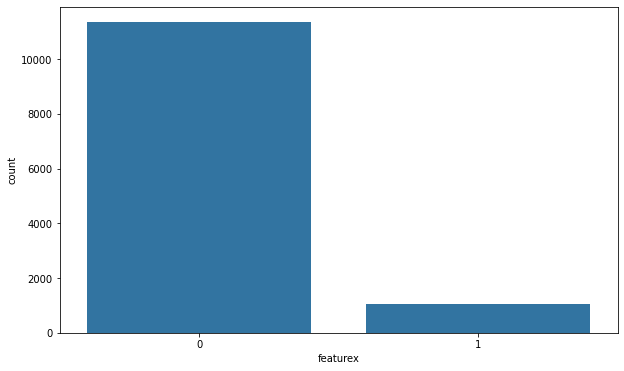

In [15]:
countplot(users1,'featurex')

### Feature Y

In [16]:
users1.featurey.unique()

array([0, 1, 3], dtype=int64)

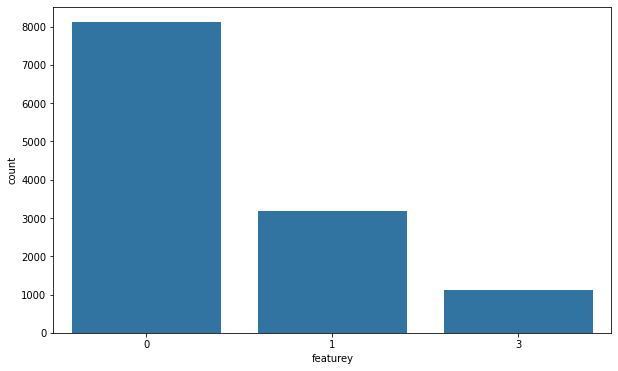

In [17]:
countplot(users1,'featurey')

### Day of the Month Created

In [18]:
users1.created_at_month.unique()

array([ 1, 12,  2, 11,  3,  5,  4], dtype=int64)

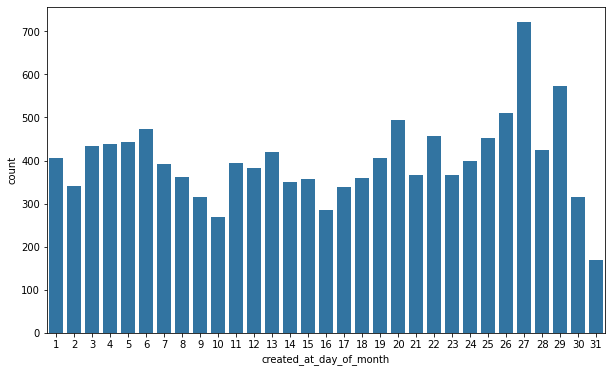

In [19]:
countplot(users1,'created_at_day_of_month')


### Month Created

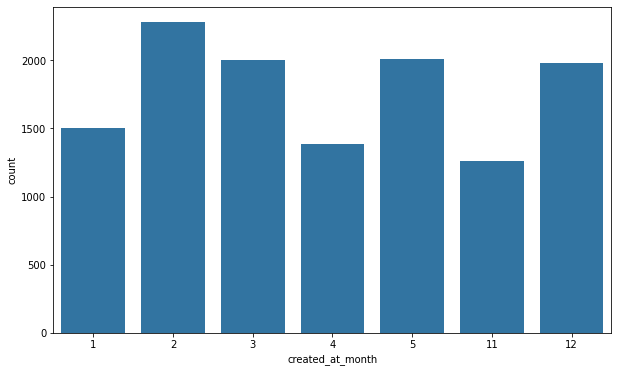

In [20]:
countplot(users1,'created_at_month')

## c) Competition

In [21]:
competition1=competition.copy()

In [22]:
competition1.head()

,FeatureA,FeatureB,FeatureC,FeatureD,FeatureE,SecretCode,FeatureF,FeatureG,FeatureH,FeatureI,Country_ID,Comp_ID,End Time time,End Time Year,End Time Month,End Time Day_of_month,Start Time time,Start Time Year,Start Time Month,Start Time Day_of_month
0,"[2, 4]",[14],15.0,0,2,1,[3],[],[],NaN,G3F0,ID_AU0T,21:05:00,2.0,6.0,19.0,07:00:00,2,6,19
1,[1],[],3.0,0,3,1,[1],[],[1],3.0,0Q35,ID_O21T,15:30:00,2.0,2.0,15.0,12:00:00,2,2,1
2,[1],[9],2.0,0,2,1,"[1, 5]",[5],[1],2.0,EGI9,ID_W6XE,21:59:00,2.0,5.0,9.0,08:00:00,2,3,28
3,[],[],1.0,0,2,1,[1],[4],[],NaN,NaN,ID_A2FN,12:00:00,2.0,6.0,22.0,12:00:00,2,6,12
4,[],[6],NaN,0,2,0,[],[4],[2],9.0,NaN,ID_X0PD,23:59:00,2.0,5.0,31.0,09:00:00,2,5,27


In [23]:
replace(competition1)

Index(['featurea', 'featureb', 'featurec', 'featured', 'featuree',
       'secretcode', 'featuref', 'featureg', 'featureh', 'featurei',
       'country_id', 'comp_id', 'end_time_time', 'end_time_year',
       'end_time_month', 'end_time_day_of_month', 'start_time_time',
       'start_time_year', 'start_time_month', 'start_time_day_of_month'],
      dtype='object')


In [24]:
ordered_dict = {'start_time_month': [1,2,3,4,5,6,7,8,9,10,11,12],
                'end_time_month' : [1,2,3,4,5,6,7,8,9,10,11,12],
               'start_time_day_of_month':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31],
               'end_time_day_of_month':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31]}
ordered(competition1,ordered_dict)

In [25]:
competition1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   featurea                 247 non-null    object  
 1   featureb                 247 non-null    object  
 2   featurec                 196 non-null    float64 
 3   featured                 247 non-null    int64   
 4   featuree                 247 non-null    int64   
 5   secretcode               247 non-null    int64   
 6   featuref                 247 non-null    object  
 7   featureg                 247 non-null    object  
 8   featureh                 247 non-null    object  
 9   featurei                 186 non-null    float64 
 10  country_id               121 non-null    object  
 11  comp_id                  247 non-null    object  
 12  end_time_time            224 non-null    object  
 13  end_time_year            224 non-null    float64 
 14  end_time_m

In [26]:
competition1.describe()

,featurec,featured,featuree,secretcode,featurei,end_time_year,end_time_month,start_time_year,start_time_month,start_time_day_of_month
count,196.000000,247.000000,247.000000,247.000000,186.000000,224.000000,224.000000,247.000000,247.000000,247.000000
mean,11.790816,0.461538,2.170040,0.433198,11.806452,11.138393,6.031250,2.319838,5.789474,16.040486
std,10.379077,0.499531,0.544217,0.496524,10.563843,135.029289,3.554055,1.073958,3.597115,8.983181
min,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.000000,0.000000,2.000000,0.000000,3.250000,1.000000,3.000000,1.000000,3.000000,8.000000
50%,8.500000,0.000000,2.000000,0.000000,9.000000,2.000000,5.000000,2.000000,5.000000,17.000000
75%,19.250000,1.000000,2.000000,1.000000,19.750000,3.000000,9.250000,3.000000,9.000000,24.000000
max,37.000000,1.000000,3.000000,1.000000,37.000000,2023.000000,12.000000,5.000000,12.000000,31.000000


In [27]:
competition1.loc[competition1['end_time_year'] == 2023]

,featurea,featureb,featurec,featured,featuree,secretcode,featuref,featureg,featureh,featurei,country_id,comp_id,end_time_time,end_time_year,end_time_month,end_time_day_of_month,start_time_time,start_time_year,start_time_month,start_time_day_of_month
206,[1],[],NaN,1,2,0,[1],[3],[1],NaN,NaN,ID_CFN7,23:09:00,2023.0,9.0,12,06:00:00,1,5,14


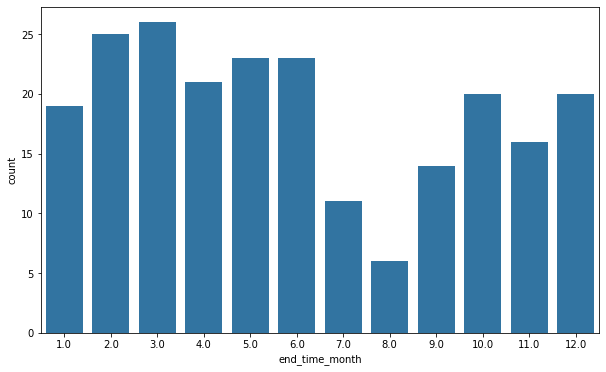

In [28]:
countplot(competition1,'end_time_month')

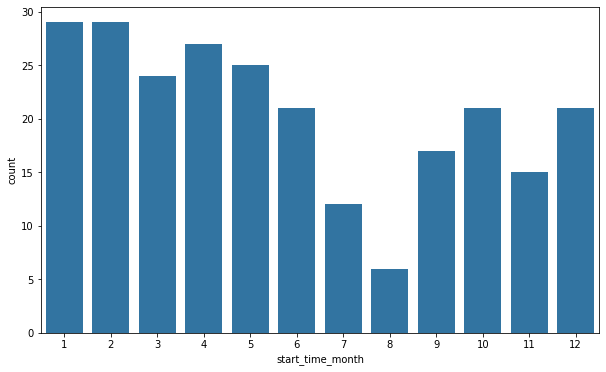

In [29]:
countplot(competition1,'start_time_month')

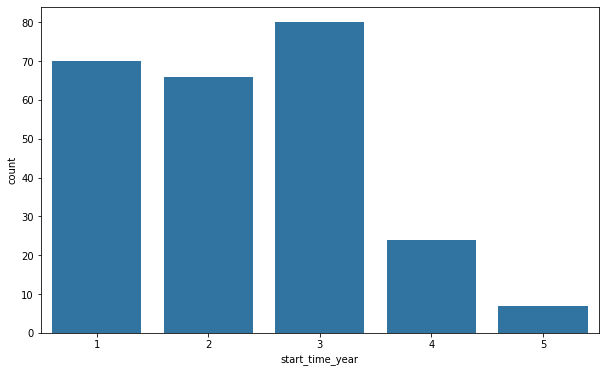

In [30]:
countplot(competition1,'start_time_year')

In [31]:
competition1.featurec.unique()

array([15.,  3.,  2.,  1., nan,  9., 10., 21., 25.,  6.,  7.,  4., 22.,
       11., 18., 17., 23., 20., 31., 29.,  5., 12., 27.,  8., 34., 35.,
       37., 36., 13., 28., 30., 32., 33., 16., 26., 14., 19., 24.])

In [32]:
competition1.featurea.unique()

array(['[2, 4]', '[1]', '[]', '[5, 2]', '[2]', '[3, 2]', '[3]', '[6, 1]',
       '[6]', '[1, 6]', '[1, 5, 4]', '[4, 7, 2]', '[8]', '[1, 3]',
       '[2, 3]', '[5]', '[4]', '[7, 3, 2]', '[4, 2]', '[2, 10, 3]',
       '[1, 4, 5]', '[7]', '[2, 4, 5]', '[3, 7]', '[5, 4]', '[1, 7]',
       '[1, 9]', '[2, 7]'], dtype=object)

In [33]:
competition1.featureb.unique()

array(['[14]', '[]', '[9]', '[6]', '[15]', '[10]', '[12]', '[16]',
       '[14, 8]', '[5]', '[7]', '[5, 7]', '[1]', '[14, 7]', '[6, 5]',
       '[7, 5, 14]', '[12, 16]', '[2]', '[5, 6]', '[7, 5]'], dtype=object)

### d) User Activity

In [34]:
user_activity1=user_activity.copy()

In [35]:
user_activity1.head()

,User_ID,Title,datetime time,datetime Year,datetime Month,datetime Day_of_month
0,ID_RT43AK77,comp_ID_IV5D,22:00:38,1,11,22
1,ID_RT43AK77,comp_ID_IV5D,00:41:02,1,11,23
2,ID_RT43AK77,comp_ID_IV5D,00:53:15,1,11,23
3,ID_RT43AK77,comp_ID_IV5D,01:23:05,1,11,23
4,ID_RT43AK77,comp_ID_IV5D,01:27:38,1,11,23


In [37]:
replace(user_activity1)

Index(['user_id', 'title', 'datetime_time', 'datetime_year', 'datetime_month',
       'datetime_day_of_month'],
      dtype='object')


In [38]:
user_activity1.title.unique()

array(['comp_ID_IV5D', 'comp_ID_M3ST', 'comp_ID_ZN92', 'comp_ID_DD5S',
       'comp_ID_1261', 'comp_ID_X0PD', 'comp_ID_L3EB', 'comp_ID_JPR9',
       'comp_ID_TDAE', 'comp_ID_Q8XJ', 'comp_ID_PDKH', 'comp_ID_NKJR',
       'comp_ID_AL6C', 'comp_ID_JX23', 'comp_ID_YDM3', 'comp_ID_8B8I',
       'comp_ID_UU4Y', 'comp_ID_56O8', 'comp_ID_GR92', 'comp_ID_I9BN',
       'comp_ID_M3G0', 'comp_ID_V0FX', 'comp_ID_528W', 'comp_ID_JRC2',
       'comp_ID_F7QD', 'comp_ID_D3SA', 'comp_ID_0SN1', 'comp_ID_GWL0',
       'comp_ID_WOVD', 'comp_ID_VGMZ', 'comp_ID_J883', 'comp_ID_Y6FW',
       'comp_ID_6E1C', 'comp_ID_PB3Q', 'comp_ID_3RMM', 'comp_ID_P8BQ',
       'comp_ID_3URQ', 'comp_ID_8LGP', 'comp_ID_RBCT', 'comp_ID_Y4Y2',
       'comp_ID_CFN7', 'comp_ID_1DWD', 'comp_ID_GVGW', 'comp_ID_KESL',
       'comp_ID_20XL', 'comp_ID_W18I', 'comp_ID_U2NJ', 'comp_ID_PJZC',
       'comp_ID_MN35', 'comp_ID_IRWB', 'comp_ID_XRP7', 'comp_ID_HCST',
       'comp_ID_1CTF', 'comp_ID_AS79', 'comp_ID_CNBR', 'comp_ID_J5IZ',
      

In [47]:
user_activity1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317292 entries, 0 to 317291
Data columns (total 6 columns):
 #   Column                 Non-Null Count   Dtype   
---  ------                 --------------   -----   
 0   user_id                317292 non-null  object  
 1   title                  317292 non-null  object  
 2   datetime_time          317292 non-null  object  
 3   datetime_year          317292 non-null  int64   
 4   datetime_month         317292 non-null  int64   
 5   datetime_day_of_month  317292 non-null  category
dtypes: category(1), int64(2), object(3)
memory usage: 12.4+ MB


In [39]:
ordered_dict = {'datetime_month': [1,2,3,4,5,6,7,8,9,10,11,12],
               'datetime_day_of_month':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31]}
ordered(user_activity1,ordered_dict)

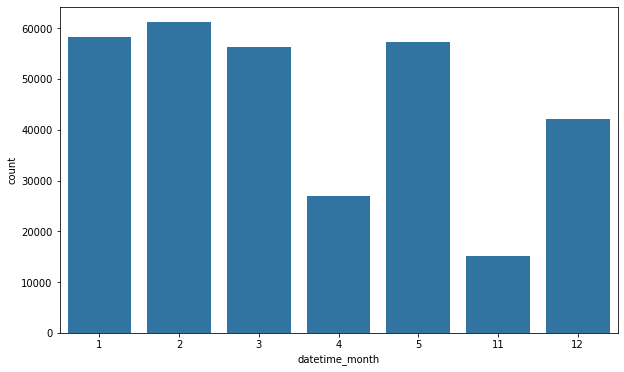

In [40]:
countplot(user_activity1,'datetime_month')

### Users engagement

In [46]:
val=user_activity1['title'].str.startswith('comp', na=False)
comp=user_activity1[val]

## Merge user activity and user


In [50]:
merged_df=users1.merge(user_activity1,how='left')
merged_df

,featurex,featurey,user_id,countries_id,created_at_time,created_at_year,created_at_month,created_at_day_of_month,title,datetime_time,datetime_year,datetime_month,datetime_day_of_month
0,0,0,ID_DC6S4E9O,X9GR,19:33:13.663391,1,1,16,blog_ID_TTTU,20:15:58,1.0,4.0,17
1,0,0,ID_DC6S4E9O,X9GR,19:33:13.663391,1,1,16,Signed Up,20:33:13,1.0,1.0,16
2,0,0,ID_DC6S4E9O,X9GR,19:33:13.663391,1,1,16,$create_alias,20:33:14,1.0,1.0,16
3,0,0,ID_DC6S4E9O,X9GR,19:33:13.663391,1,1,16,$identify,20:33:14,1.0,1.0,16
4,0,0,ID_DC6S4E9O,X9GR,19:33:13.663391,1,1,16,Viewed All Discussions,20:33:14,1.0,1.0,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...
319300,0,1,ID_8K4FGJYO,G4PG,10:22:54.369939,1,12,5,Viewed All Discussions,11:22:55,1.0,12.0,5
319301,0,1,ID_8K4FGJYO,G4PG,10:22:54.369939,1,12,5,Confirmed Email,11:23:01,1.0,12.0,5
319302,0,1,ID_8K4FGJYO,G4PG,10:22:54.369939,1,12,5,Updated Profile,11:23:11,1.0,12.0,5
319303,0,1,ID_8K4FGJYO,G4PG,10:22:54.369939,1,12,5,Updated Profile,11:23:42,1.0,12.0,5


In [65]:
df=merged_df.copy()

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 319305 entries, 0 to 319304
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   featurex                 319305 non-null  int64   
 1   featurey                 319305 non-null  int64   
 2   user_id                  319305 non-null  object  
 3   countries_id             199217 non-null  object  
 4   created_at_time          319305 non-null  object  
 5   created_at_year          319305 non-null  int64   
 6   created_at_month         319305 non-null  int64   
 7   created_at_day_of_month  319305 non-null  category
 8   title                    317292 non-null  object  
 9   datetime_time            317292 non-null  object  
 10  datetime_year            317292 non-null  float64 
 11  datetime_month           317292 non-null  float64 
 12  datetime_day_of_month    317292 non-null  category
dtypes: category(2), float64(2), int64(4), object